# SQL

Цель исследования: исследовать базу данных о книгах, и сформировать ценностное предложение на будущее.

### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

### Решение

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

# устанавливаем параметры для запроса к базе
db_config = {'user': 'xxxxxxxxx', # имя пользователя
 'pwd': 'xxxxxxxxxx', # пароль
 'host': 'xxxxxxxxxxx',
 'port': 6432, # порт подключения
 'db': 'xxxxxx'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

##### Выведу первые строки таблиц и сводную информацию для общего представления

In [2]:
tables = ['books', 'authors', 'ratings', 'reviews', 'publishers']

In [3]:
for table in tables:
    query = '''
SELECT * FROM {} LIMIT 5'''.format(table)
    df = pd.io.sql.read_sql(query, con = engine)
    print('Таблица:', table)
    display(df)
    display(df.info())
    print()

Таблица: books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
book_id             5 non-null int64
author_id           5 non-null int64
title               5 non-null object
num_pages           5 non-null int64
publication_date    5 non-null object
publisher_id        5 non-null int64
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


None


Таблица: authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
author_id    5 non-null int64
author       5 non-null object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


None


Таблица: ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
rating_id    5 non-null int64
book_id      5 non-null int64
username     5 non-null object
rating       5 non-null int64
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


None


Таблица: reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
review_id    5 non-null int64
book_id      5 non-null int64
username     5 non-null object
text         5 non-null object
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


None


Таблица: publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
publisher_id    5 non-null int64
publisher       5 non-null object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


None

Убедился, что данные соответствуют заявленной структуре.

#### Посчитаю, сколько книг вышло после 1 января 2000 года;

In [4]:
# функция для выполнения запроса
def get_data(query):
    return pd.io.sql.read_sql(query, con = engine)

In [5]:
# книг всего
get_data('SELECT count(*) FROM books')

,count
0,1000


In [6]:
# книг после 1 января 2000 года
get_data('SELECT count(*) FROM books WHERE publication_date::date >= make_date(2000,1,1)')

,count
0,821


Вывод: после 1 января 2000 года выпущена 821 книга, что приблизительно составляет 82% всех выпущенных в издательствах книг. Букинистические издания - редкость.

#### Для каждой книги посчитаю количество обзоров и среднюю оценку;

,book_id,title,author,reviews_count,average_rating
0,652,The Body in the Library (Miss Marple #3),Agatha Christie,2.0,4.500000
1,273,Galápagos,Kurt Vonnegut Jr.,2.0,4.500000
2,51,A Tree Grows in Brooklyn,Betty Smith,5.0,4.250000
3,951,Undaunted Courage: The Pioneering First Missio...,Stephen E. Ambrose,2.0,4.000000
4,839,The Prophet,Kahlil Gibran/جبران خليل جبران/Jihad El,4.0,4.285714


reviews_count     3.0
average_rating    4.0
dtype: float64

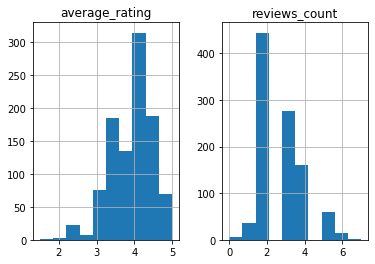

In [7]:
books_rating_reviews = get_data('''
WITH rc AS (
SELECT
    book_id,
    COUNT(*) AS count
FROM
    reviews
GROUP BY
    book_id),
ar AS (
SELECT
    book_id,
    AVG(rating) AS avg
FROM
    ratings
GROUP BY
    book_id)

SELECT
    books.book_id,
    books.title,
    authors.author,
    rc.count AS reviews_count,
    ar.avg AS average_rating
FROM books
LEFT JOIN rc ON books.book_id = rc.book_id
LEFT JOIN ar ON books.book_id = ar.book_id
LEFT JOIN authors ON books.author_id = authors.author_id
''')

values = {'reviews_count':0}
books_rating_reviews = books_rating_reviews.fillna(value=values)
display(books_rating_reviews.head())
books_rating_reviews[['reviews_count', 'average_rating']].hist();
books_rating_reviews[['reviews_count', 'average_rating']].median()

Практически все книги имеют хотя бы один обзор и высокую среднюю оценку.

#### Определю издательство, которое выпустило наибольшее число книг толще 50 страниц, чтобы исключить брошюры

In [8]:
get_data('''
WITH b50 AS (
SELECT
    *
FROM
    books
WHERE
    num_pages > 50)

SELECT
    MAX(publishers.publisher) AS publisher,
    COUNT(b50.book_id) AS books_50_plus
FROM b50
LEFT JOIN publishers ON b50.publisher_id = publishers.publisher_id
GROUP BY
    publishers.publisher_id
ORDER BY
    COUNT(*) DESC
LIMIT 1
''')

,publisher,books_50_plus
0,Penguin Books,42


#### Определю автора с самой высокой средней оценкой книг — только книги с 50 и более оценками;

In [11]:
get_data('''
-- отбор книг с 50 и более оценками + средний рейтинг
WITH b50r AS (
SELECT
    book_id,
    AVG(rating) AS avgr
FROM
    ratings
GROUP BY
    book_id
HAVING
    COUNT(*) >= 50)
    
SELECT
    AVG(b50r.avgr) AS avg_rating,
    authors.author
FROM
    b50r
LEFT JOIN books ON b50r.book_id = books.book_id
LEFT JOIN authors ON books.author_id = authors.author_id
GROUP BY
    authors.author_id
ORDER BY
    AVG(b50r.avgr) DESC

''')

,avg_rating,author
0,4.283844,J.K. Rowling/Mary GrandPré
1,4.264151,Markus Zusak/Cao Xuân Việt Khương
2,4.258446,J.R.R. Tolkien
3,4.192308,Louisa May Alcott
4,4.080645,Rick Riordan
5,3.901408,William Golding
6,3.825581,J.D. Salinger
7,3.789474,Paulo Coelho/Alan R. Clarke/Özdemir İnce
8,3.787879,William Shakespeare/Paul Werstine/Barbara A. M...
9,3.754540,Dan Brown


#### Посчитаю среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [10]:
get_data('''
WITH us50 AS (
SELECT
    username,
    COUNT(*) AS num_ratings
FROM ratings
GROUP BY
    username
HAVING
    COUNT(*) > 50),
avg_user_rew AS (
SELECT
    COUNT(*) as num_reviews,
    username
FROM
    reviews
GROUP BY
    username
)

SELECT 
    ROUND(AVG(avg_user_rew.num_reviews)) AS avg_reviews
FROM
    us50
LEFT JOIN avg_user_rew ON us50.username = avg_user_rew.username
''')

,avg_reviews
0,24.0


Соотношение примерно 1 обзор на 2 оценки.